# Supplemental Notebook 2
Re-assembly, quality evaluation, and annotation of 678 microbial eukaryotic reference transcriptomes

Johnson LK et al. 2018


## Trinity *de novo* transcriptome assembly software version comparisons

In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import matplotlib as mpl

# mpl.rcParams['font.sans-serif']='Arial'
# mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [14]:
#transrate reference metrics
file_transrate_220_v_232 = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_trinity2.3.2.csv"
file_transrate_232_v_220 = "../assembly_evaluation_data/transrate_reverse_trinity2.3.2_v_trinity2.2.0.csv"
file_transrate_2014_v_220 = "../assembly_evaluation_data/transrate_reverse_trinity2014_v_trinity2.2.0.csv"
file_transrate_220_v_2014 = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_trinity2014.csv"
trinity_220_v_232 = pd.read_csv(file_transrate_220_v_232, index_col='SampleName')
trinity_232_v_220 = pd.read_csv(file_transrate_232_v_220, index_col='SampleName')
trinity_2014_v_220 = pd.read_csv(file_transrate_2014_v_220, index_col='SampleName')
trinity_220_v_2014 = pd.read_csv(file_transrate_220_v_2014, index_col='SampleName')

In [16]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='gray', color2='#018E42', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.2, lw=2)
    # prints numbers higher in DIB or NCGR assemblies
    #ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            #color= color1, fontsize='x-large', fontweight='heavy')
    #ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            #color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.3)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold', fontname='Arial')
    ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    ax.tick_params(axis='y', which='both', right='off')
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")

    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='gray', color1='#018E42', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.5)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.5)
    
    [x1,x2]=ax.get_xlim()
    #plot NCGR mean
    ax.plot([0,1], [df[col1].mean()]*2,'--', color='black')
    #plot DIB mean
    ax.plot([1,2], [df[col2].mean()]*2, '--', color='#004F24')
    ax.text(0.5+x1/2, df[col1].mean(), str(round(df[col1].mean(),2)), fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')
    ax.text(0.5+x2/2, df[col2].mean(), str(round(df[col2].mean(),2)), fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')

    ax.set_xlim(x1,x2)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    ax.set_axis_bgcolor('white')
    ax.set_yticklabels('')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    ax.tick_params(axis='y', which='both', right='off')

def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.90):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold', fontname='Arial')
    
    return outdf, fig, ax

# Trinity 2.2.0 vs. 2.3.2

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


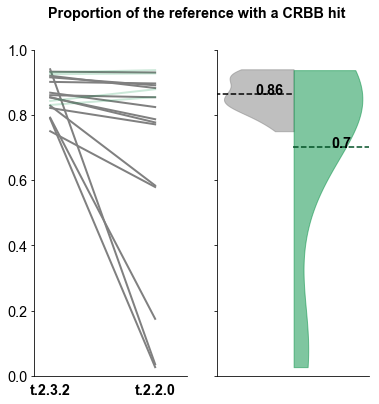

In [23]:
p_refs,fig, ax = create_plots(trinity_232_v_220,trinity_220_v_232, 'p_refs_with_CRBB', 'Proportion of the reference with a CRBB hit',df1name='t.2.3.2',df2name='t.2.2.0',ymax=1, ypos=1)
fig.savefig('../paper/supplement_trinity_2.2.0_v_2.3.2_CRB-blast.pdf',bbox_inches="tight")
fig.savefig('../paper/supplement_trinity_2.2.0_v_2.3.2_CRB-blast.png',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


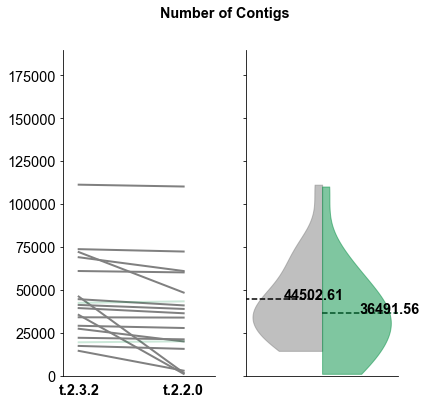

In [27]:
p_refs,fig, ax = create_plots(trinity_232_v_220,trinity_220_v_232, 'n_seqs', 'Number of Contigs',df1name='t.2.3.2',df2name='t.2.2.0',ymax=190000, ypos=55000)
fig.savefig('../paper/supplement_trinity_versions_n_contigs.pdf',bbox_inches="tight")
fig.savefig('../paper/supplement_trinity_versions_n_contigs.png',bbox_inches="tight")

# Trinity 2014 vs. 2.2.0

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


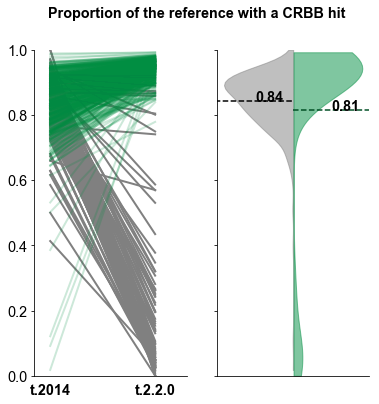

In [24]:
p_refs,fig, ax = create_plots(trinity_2014_v_220,trinity_220_v_2014, 'p_refs_with_CRBB', 'Proportion of the reference with a CRBB hit',df1name='t.2014',df2name='t.2.2.0',ymax=1, ypos=1)

fig.savefig('../paper/supplement_trinity_versions_CRB-blast.pdf',bbox_inches="tight")
fig.savefig('../paper/supplement_trinity_versions_CRB-blast.png',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


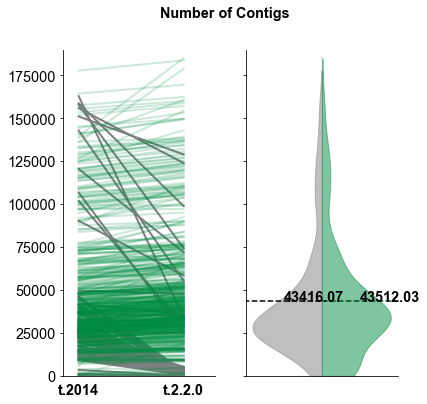

In [26]:
p_refs,fig, ax = create_plots(trinity_2014_v_220,trinity_220_v_2014, 'n_seqs', 'Number of Contigs',df1name='t.2014',df2name='t.2.2.0',ymax=190000, ypos=55000)

fig.savefig('../paper/supplement_trinity_versions_n_contigs.pdf',bbox_inches="tight")
fig.savefig('../paper/supplement_trinity_versions_n_contigs.png',bbox_inches="tight")